# Lab 8: Define and Solve an ML Problem of Your Choosing

In [20]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2" # suppress info and warning messages
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time 
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import time
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from tensorflow.keras.layers import BatchNormalization
from sklearn.preprocessing import LabelEncoder

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [21]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")

df = pd.read_csv(adultDataSet_filename)

df.head()
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_binary'],
      dtype='object')

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. I have chosen the census dataset.
2. I want to predict income based off of different social. The label would be binary classification: >= 50. or <=50
3.This is a supervised learning problem. We will provide the label to the model to learn form. This is a binary classification problem.
4. age, workclass, education, marital status, occupation, race, sex, and hours per week.
5. This problem is important because it helps capture how different socialgroup face underrepresentation in the real world. For example, it captures social equity trends, bias detection, and ethics using the different dataset of different demographics.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [22]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [23]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32399.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32236.000000
mean,38.589216,1.897784e+05,10.080679,615.907773,87.303830,40.450428
std,13.647862,1.055500e+05,2.572720,2420.191974,402.960219,12.353748
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,14084.000000,4356.000000,99.000000


In [24]:
nan_count = df.isna().sum()
nan_count

age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64

## Replace missing values

In [25]:
df['age'] = df['age'].fillna(df['age'].mean())
df['hours-per-week'] = df['hours-per-week'].fillna(df['hours-per-week'].mean())

In [26]:
df.dropna(inplace=True)

In [27]:
nan_count = df.isna().sum()
nan_count

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex_selfID        0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income_binary     0
dtype: int64

## Use one hot encoding for label and columns that are non-numeric

In [28]:
df['income_binary'] = LabelEncoder().fit_transform(df['income_binary'])
df = df.drop(columns=['income'], errors='ignore')

categorical_cols = df.select_dtypes(include='object').columns.tolist()
df = pd.get_dummies(df, columns=categorical_cols)
df.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income_binary', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Private',
       ...
       'native-country_Portugal', 'native-country_Puerto-Rico',
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Vietnam', 'native-country_Yugoslavia'],
      dtype='object', length=105)

In [29]:

X = df.drop(columns=['income_binary'])
y = df['income_binary'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. I took all the features that weren't numerical and used one-hot encoding to manipulate them. Later on in my code I also scaled the features using Sckikit Learning StandardScaler and used Random Forest to grab the best features.



2. Handle missing data, use one-hot encoding, scaling features, and I will use Tran Test Split to separate features and labels into training and testing groups. 


3. I am using random forest, a neural network, and Logistic Regression to perform my procedures. I wanted to do this out curiosity on how the models would react to the dataset.

4. I plan to really test the hyperparameters. Especially for the neural network. I used different regulation techniques, optimizers like adam and SGD, and different epochs. I then will try to get the best result without overfitting or underfitting. After going through the testing and validation steps I will test the model. In particular, I will test the model against simpler models that are more recommended for this model. I will then compare and contrast the results by testing the accuracy for both models and viewing their perfomance holistically.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [46]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import pandas as pd
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2" # suppress info and warning messages
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time 
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import time
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from tensorflow.keras.layers import BatchNormalization

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

# Scale Features
### In this case I will use the scale provided by Sklearn

In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use Random Forest to grab the top features 
### ** To reduce noise

In [48]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

importances = rf_model.feature_importances_
feature_names = X_train.columns

In [49]:
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
importance_df = importance_df.sort_values(by='importance', ascending=False)
top_n = 50
top_features = importance_df['feature'].iloc[:top_n].tolist()
print(top_features)

['fnlwgt', 'age', 'capital-gain', 'hours-per-week', 'marital-status_Married-civ-spouse', 'education-num', 'relationship_Husband', 'capital-loss', 'marital-status_Never-married', 'occupation_Exec-managerial', 'occupation_Prof-specialty', 'education_Bachelors', 'relationship_Not-in-family', 'workclass_Private', 'education_Masters', 'relationship_Wife', 'relationship_Own-child', 'sex_selfID_Female', 'sex_selfID_Non-Female', 'workclass_Self-emp-not-inc', 'education_HS-grad', 'occupation_Sales', 'occupation_Craft-repair', 'marital-status_Divorced', 'occupation_Other-service', 'race_White', 'occupation_Adm-clerical', 'workclass_Local-gov', 'workclass_Self-emp-inc', 'education_Some-college', 'relationship_Unmarried', 'occupation_Farming-fishing', 'native-country_United-States', 'occupation_Tech-support', 'workclass_Federal-gov', 'race_Black', 'workclass_State-gov', 'education_Prof-school', 'occupation_Transport-moving', 'occupation_Machine-op-inspct', 'education_Doctorate', 'occupation_Protec

In [50]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_train_top = X_train_scaled_df[top_features]
X_test_top = X_test_scaled_df[top_features]

# Neural Network Model:

In [51]:
nn_model = keras.Sequential()

### I will use batch normalization and regularization 

In [52]:
nn_model.add(Dense(64, activation='relu',input_shape=(X_train_top.shape[1],)))
#add batch normalization
nn_model.add(BatchNormalization())
#dropout to addin in regularization
nn_model.add(keras.layers.Dropout(.3))


nn_model.add(Dense(32, activation='relu'))
nn_model.add(BatchNormalization())
nn_model.add(keras.layers.Dropout(.3))

nn_model.add(Dense(16, activation='relu'))
nn_model.add(BatchNormalization())
nn_model.add(keras.layers.Dropout(.3))

nn_model.add(Dense(1, activation='sigmoid'))
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                3264      
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)                256       
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
batch_normalization_4 (Batch (None, 32)                128       
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)               

In [53]:
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.001)

In [54]:
loss_fn = keras.losses.BinaryCrossentropy(from_logits=False)

In [55]:
nn_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

## Taken from Unit 8 Assignment:

In [56]:
class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))


In [57]:
t0 = time.time()

num_epochs = 115

history = nn_model.fit(X_train_top, y_train, epochs=num_epochs, verbose=0, validation_split=0.2, callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)])

t1 = time.time()

print('Elapsed time: %.2fs' % (t1-t0))

Epoch [5/ 115], Loss: 0.5088, Accuracy: 0.7667, Val_loss: 0.4192, Val_accuracy: 0.8241
Epoch [10/ 115], Loss: 0.4475, Accuracy: 0.7995, Val_loss: 0.3876, Val_accuracy: 0.8297
Epoch [15/ 115], Loss: 0.4291, Accuracy: 0.8083, Val_loss: 0.3751, Val_accuracy: 0.8319
Epoch [20/ 115], Loss: 0.4132, Accuracy: 0.8157, Val_loss: 0.3664, Val_accuracy: 0.8357
Epoch [25/ 115], Loss: 0.4026, Accuracy: 0.8203, Val_loss: 0.3610, Val_accuracy: 0.8376
Epoch [30/ 115], Loss: 0.3871, Accuracy: 0.8291, Val_loss: 0.3564, Val_accuracy: 0.8392
Epoch [35/ 115], Loss: 0.3865, Accuracy: 0.8294, Val_loss: 0.3523, Val_accuracy: 0.8390
Epoch [40/ 115], Loss: 0.3868, Accuracy: 0.8229, Val_loss: 0.3516, Val_accuracy: 0.8406
Epoch [45/ 115], Loss: 0.3811, Accuracy: 0.8257, Val_loss: 0.3495, Val_accuracy: 0.8418
Epoch [50/ 115], Loss: 0.3770, Accuracy: 0.8292, Val_loss: 0.3481, Val_accuracy: 0.8425
Epoch [55/ 115], Loss: 0.3715, Accuracy: 0.8306, Val_loss: 0.3463, Val_accuracy: 0.8430
Epoch [60/ 115], Loss: 0.3707, Ac

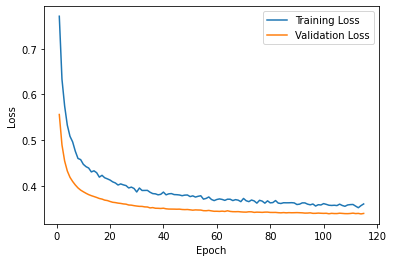

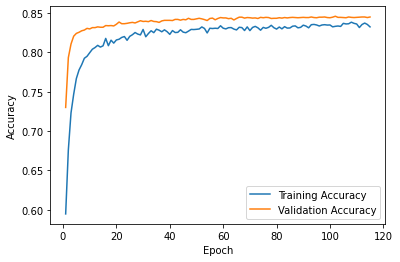

In [59]:
# Plot training and validation loss
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plot training and validation accuracy
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [60]:
loss, accuracy = nn_model.evaluate(X_test_top,y_test)

print('Loss: ', str(loss) , 'Accuracy: ', str(accuracy))

283/283 [==============================] - 0s 1ms/step - loss: 0.3403 - accuracy: 0.8394
Loss:  0.340269535779953 Accuracy:  0.8394297957420349


In [61]:
probability_predictions = nn_model.predict(X_test_top)

print("Predictions for the first 20 examples:")
y_test_np = y_test.to_numpy()
for i in range(20):
    prob = probability_predictions[i][0]
    predicted_class = 1 if prob > 0.5 else 0
    actual_class = y_test_np[i]
    print(f"Example {i+1}: Probability={prob:.4f}, Predicted Class={predicted_class}, Actual Class={actual_class}")

Predictions for the first 20 examples:
Example 1: Probability=0.0031, Predicted Class=0, Actual Class=0
Example 2: Probability=0.5796, Predicted Class=1, Actual Class=1
Example 3: Probability=0.1416, Predicted Class=0, Actual Class=0
Example 4: Probability=0.2024, Predicted Class=0, Actual Class=0
Example 5: Probability=0.6530, Predicted Class=1, Actual Class=0
Example 6: Probability=0.0372, Predicted Class=0, Actual Class=0
Example 7: Probability=0.6640, Predicted Class=1, Actual Class=0
Example 8: Probability=0.3366, Predicted Class=0, Actual Class=1
Example 9: Probability=0.3097, Predicted Class=0, Actual Class=1
Example 10: Probability=0.0189, Predicted Class=0, Actual Class=0
Example 11: Probability=0.0093, Predicted Class=0, Actual Class=0
Example 12: Probability=0.0074, Predicted Class=0, Actual Class=0
Example 13: Probability=0.1376, Predicted Class=0, Actual Class=0
Example 14: Probability=0.5997, Predicted Class=1, Actual Class=0
Example 15: Probability=0.0066, Predicted Clas

# Here is a more simple implementation using Logistic Regression:

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(max_iter=1000, random_state=42)

logreg.fit(X_train_top, y_train)

y_pred = logreg.predict(X_test_top)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8423030169079456

## The score is similar to the neural network test score. However, it is easier and fatser to implement and train logistic regression. Therefore, using a less complex model like Logistic Regression is just as good as using a neural network through this process. Neural Network might need more tweaking before it performs more effective than a simpler model